# Shanmuga Priyan Jeevanandam
   # C0889053
   https://github.com/shanmugapriyan357/Sentiment-Analysis-with-IMDB-Dataset

# **Dataset Preparation**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load dataset
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Load dataset
(vocab_size, max_len) = (10000, 200)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# **Building the RNN Model**

In [ ]:
# Define the RNN model
model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the RNN model
model_rnn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# **Training the Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 390ms/step - accuracy: 0.5806 - loss: 0.7032 - val_accuracy: 0.8064 - val_loss: 0.5526
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 369ms/step - accuracy: 0.8006 - loss: 0.5270 - val_accuracy: 0.8402 - val_loss: 0.4144
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 364ms/step - accuracy: 0.8528 - loss: 0.4111 - val_accuracy: 0.8508 - val_loss: 0.3983
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 360ms/step - accuracy: 0.8728 - loss: 0.3648 - val_accuracy: 0.8582 - val_loss: 0.3728
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 357ms/step - accuracy: 0.8884 - loss: 0.3260 - val_accuracy: 0.8622 - val_loss: 0.3666
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 360ms/step - accuracy: 0.8993 - loss: 0.3017 - val_accuracy: 0.8710 - val_loss: 0.3344
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 364ms/step - accuracy: 0.9024 - loss: 0.2920 - val_accuracy: 0.8640 - val_loss: 0.3464
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 362ms/step - accuracy: 0.9156 -

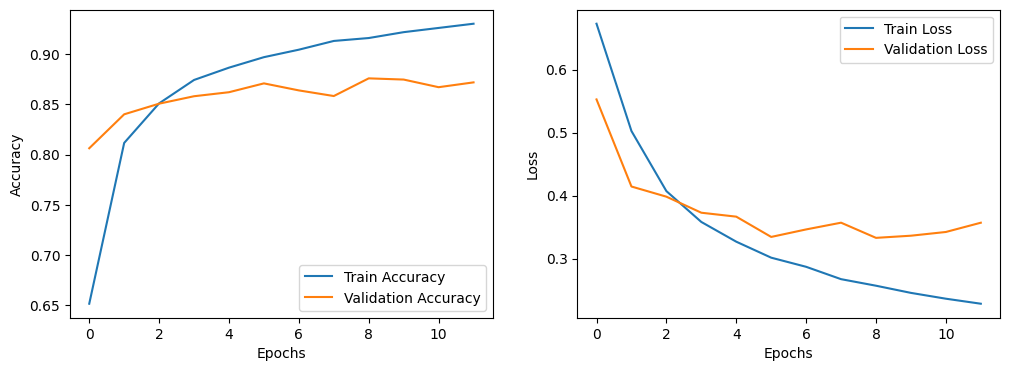

In [3]:
# Train the RNN model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_rnn = model_rnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=64, callbacks=[early_stopping])

# Evaluate the RNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test, y_test)
print(f'RNN Test Accuracy: {accuracy_rnn:.2f}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Simple Feedforward Neural Network Implementation**

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6844 - loss: 0.9607 - val_accuracy: 0.8562 - val_loss: 0.6005
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.5386 - val_accuracy: 0.8568 - val_loss: 0.6335
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9359 - loss: 0.4554 - val_accuracy: 0.8510 - val_loss: 0.7552
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8516 - loss: 0.6147
Simple Feedforward Network Test Accuracy: 0.85


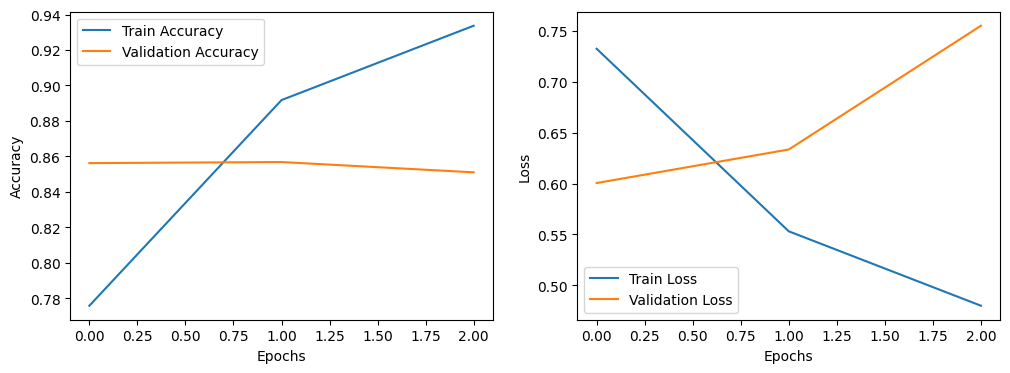

In [4]:
# Define the simple feedforward neural network model
model_ffn = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the FFN model
model_ffn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the FFN model with early stopping
history_ffn = model_ffn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=64, callbacks=[early_stopping])

# Evaluate the FFN model
loss_ffn, accuracy_ffn = model_ffn.evaluate(x_test, y_test)
print(f'Simple Feedforward Network Test Accuracy: {accuracy_ffn:.2f}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ffn.history['accuracy'], label='Train Accuracy')
plt.plot(history_ffn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_ffn.history['loss'], label='Train Loss')
plt.plot(history_ffn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Evaluating the Model**

782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.8542 - loss: 0.4758
Test Accuracy: 0.85


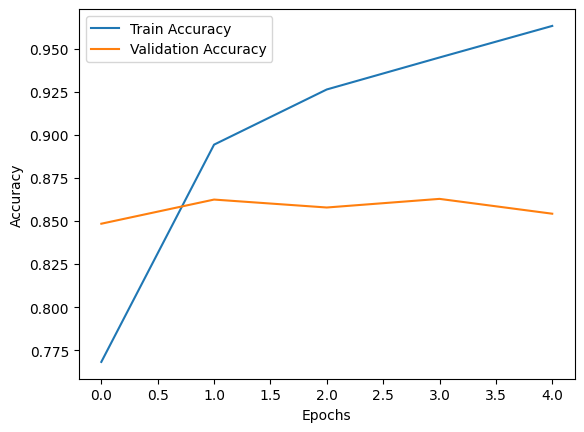

In [4]:
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Hyperparameter Tuning**

In [6]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


# **Comparative Analysis**

In [7]:
model_ffn = Sequential([
    Dense(128, input_shape=(max_len,), activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ffn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_ffn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64)

loss_ffn, accuracy_ffn = model_ffn.evaluate(x_test, y_test)
print(f'Simple Feedforward Network Test Accuracy: {accuracy_ffn:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5007 - loss: 277.3637 - val_accuracy: 0.5026 - val_loss: 106.8254
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5583 - loss: 71.0902 - val_accuracy: 0.5064 - val_loss: 49.9537
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5834 - loss: 25.9989 - val_accuracy: 0.5148 - val_loss: 17.4559
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6003 - loss: 8.3906 - val_accuracy: 0.5114 - val_loss: 4.6247
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5753 - loss: 3.0047 - val_accuracy: 0.5036 - val_loss: 2.9676
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5655 - loss: 2.1613 - val_accuracy: 0.5108 - val_loss: 2.4078
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5617 - loss: 1.9517 - val_accuracy: 0.5196 - val_loss: 3.2692
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5718 - loss: 1.7404 - val_accuracy: 0.517